# Adaptive multi-scale sub-sampling for timeseries data
`idx = adaptive_resampling_index(y, thresholds)` can be used to compute a multi-scale index of the timeseries data. Each entry of `idx` specifies the sub-sampling level corresponding to one of the error `thresholds`, where level `0` is the original signal, and higher levels correspond to sparser sub-sampling. Note that a certain level of downsampling is assumed to include all higher levels. Thus, `y[idx >= level]` will return sub-sampled data points at given level.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ares import adaptive_resampling_index

## Simple test-case

In [2]:
# create dummy data
t = np.linspace(0, 10, 100)
y = np.sin(0.2 * t**2)

In [3]:
# subsample to different error thresholds
thresholds = [0, 0.01, 0.1, 1]
%time subidx = adaptive_resampling_index(y, thresholds=thresholds, verbose=1)

Target threshold:  1
- error:  1.848368696668607
- error:  1.8989995453831963
- error:  1.8728146989021286
- error:  1.8244326733490208
- error:  1.7740971098614602
- error:  1.5935857858365798
- error:  0.2768610720843726
Target threshold:  0.1
- error:  0.2768610720843726
- error:  0.3059867424907816
- error:  0.09620093829166598
Target threshold:  0.01
- error:  0.09620093829166598
- error:  0.04206663587561671
- error:  0.029610957551835404
- error:  0.01151474109092021
- error:  0.009774902468605462
Target threshold:  0
- error:  0.009774902468605462
- error:  0.006762478266021887
- error:  0.0012974169544399672
- error:  0.0006445860666276504
- error:  0.00043616703265647594
- error:  5.111290094550469e-05
- error:  2.7755575615628914e-17
CPU times: user 26.8 ms, sys: 12.4 ms, total: 39.2 ms
Wall time: 29.4 ms


In [4]:
# compute compression ratios
levels, counts = np.unique(subidx, return_counts=True)
ratios = counts[::-1].cumsum()[::-1]
ratios = ratios/ratios[0]

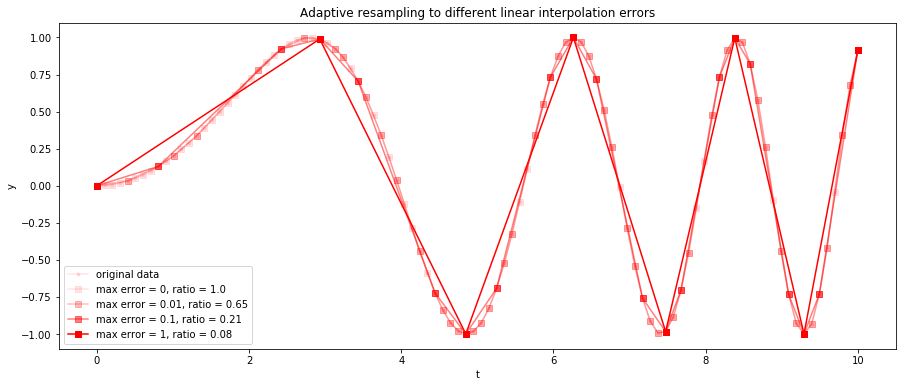

In [5]:
alphas = [0.1, 0.25, 0.5, 1.0]
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(t, y, 'r.-', alpha=0.1, label='original data')
for scale, (threshold, ratio, alpha) in enumerate(zip(thresholds, ratios, alphas)):
    ax.plot(t[subidx>=scale+1], y[subidx>=scale+1], 'rs-', alpha=alpha, label='max error = {}, ratio = {}'.format(threshold, ratio))
    
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title('Adaptive resampling to different linear interpolation errors');